# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

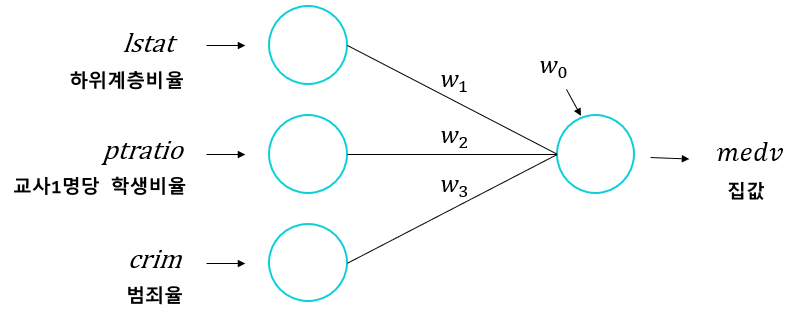

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [6]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [24]:
# 메모리 정리
from keras.backend import clear_session
clear_session()

# Sequential 타입
from keras.models import Sequential
from keras.layers import Dense
model = Sequential( [ Dense(1, input_shape=(nfeatures, )) ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [25]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [26]:
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 17ms/step - loss: 593.1486 - val_loss: 623.9100
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 549.1361 - val_loss: 580.4223
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 507.9045 - val_loss: 539.8800
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 469.7568 - val_loss: 502.6789
Epoch 5/20
11/11 [==============================] - 0s 8ms/step - loss: 434.9422 - val_loss: 468.5648
Epoch 6/20
11/11 [==============================] - 0s 5ms/step - loss: 403.6664 - val_loss: 437.9270
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 375.3531 - val_loss: 410.2797
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 349.7160 - val_loss: 384.0886
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 325.6956 - val_loss: 361.5272
Epoch 10/20
11/11 [==============================] - 0s 5ms/step - loss: 304.9943

* 학습결과 그래프

In [20]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

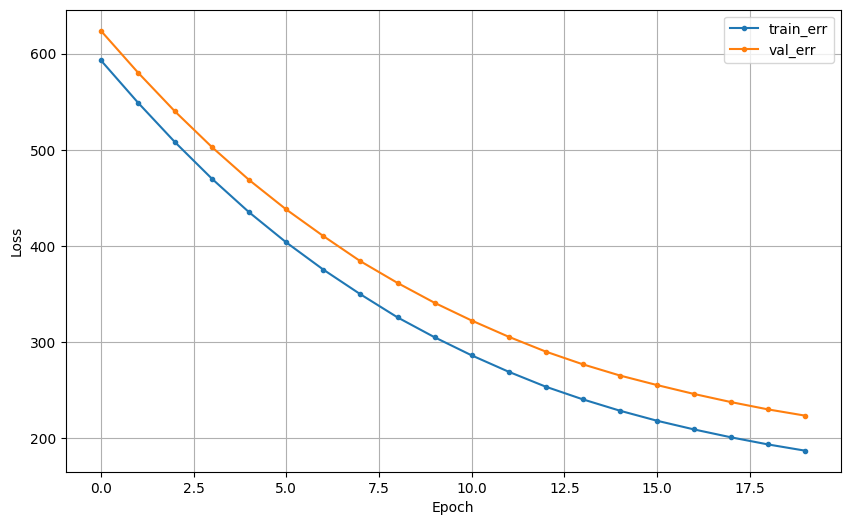

In [27]:
dl_history_plot(history)

### (3) 예측 및 검증

In [28]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [29]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 11.642881905509135
MAE  : 8.461245088016286
MAPE : 0.39287790284135504


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [30]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [31]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [32]:
nfeatures = x_train.shape[1]
nfeatures

12

In [40]:
# 메모리 정리
# from keras.backend import clear_session
clear_session()

# Sequential 타입 모델 선언
# from keras.models import Sequential
# from keras.layers import Dense
model2 = Sequential( [ Dense( 1, input_shape=(nfeatures,)) ])

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [42]:
model2.compile( optimizer=Adam(learning_rate=0.05), loss='mse')

* 학습

In [43]:
history = model2.fit(x_train, y_train, epochs=30, validation_split=.2 ).history

Epoch 1/30
11/11 [==============================] - 1s 18ms/step - loss: 549.4561 - val_loss: 538.9789
Epoch 2/30
11/11 [==============================] - 0s 8ms/step - loss: 446.0831 - val_loss: 443.1221
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 362.8953 - val_loss: 367.5152
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 297.6808 - val_loss: 311.4423
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 252.6847 - val_loss: 269.6650
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 216.6905 - val_loss: 239.3657
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 192.3433 - val_loss: 216.9877
Epoch 8/30
11/11 [==============================] - 0s 7ms/step - loss: 175.3730 - val_loss: 200.2525
Epoch 9/30
11/11 [==============================] - 0s 5ms/step - loss: 162.2837 - val_loss: 187.4314
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 153.0834

* 학습결과 그래프

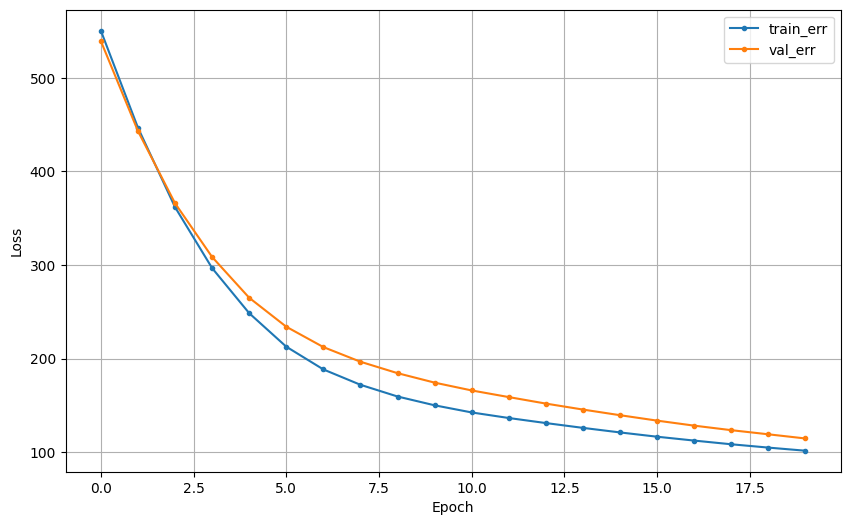

In [38]:
dl_history_plot(history)

* 예측 및 평가

In [39]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 4ms/step
RMSE : 8.775214392769204
MAE  : 6.080751583622951
MAPE : 0.3197943407958905


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [44]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [45]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [59]:
# from keras.backend import clear_session
# from keras.models import Sequential
# from keras.layers import Dense
clear_session()
model = Sequential( [ Dense(1, input_shape=(x_train.shape[1],)) ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [60]:
model.compile( optimizer = Adam(learning_rate=0.05), loss='mse')

* 학습

In [61]:
history = model.fit(x_train, y_train, epochs=300, validation_split = 0.2).history

Epoch 1/300
11/11 [==============================] - 1s 18ms/step - loss: 534.5191 - val_loss: 524.0582
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 433.0693 - val_loss: 430.7586
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 351.6238 - val_loss: 356.8235
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 288.8436 - val_loss: 301.7308
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 242.7353 - val_loss: 260.5206
Epoch 6/300
11/11 [==============================] - 0s 7ms/step - loss: 209.8275 - val_loss: 230.9606
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 186.2583 - val_loss: 210.4737
Epoch 8/300
11/11 [==============================] - 0s 5ms/step - loss: 170.1718 - val_loss: 195.1212
Epoch 9/300
11/11 [==============================] - 0s 5ms/step - loss: 158.1697 - val_loss: 182.9174
Epoch 10/300
11/11 [==============================] - 0s 5ms/step - loss

* 학습결과 그래프

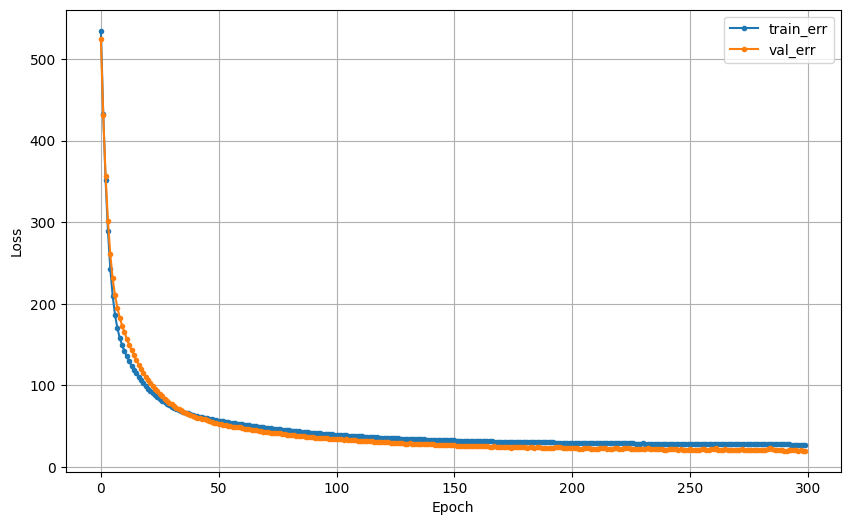

In [62]:
dl_history_plot(history)

* 예측 및 평가

In [63]:
y_pred = model.predict(x_val)
print('RMSE :', mean_squared_error(y_val, y_pred, squared=False) )
print('MAE :', mean_absolute_error(y_val, y_pred))
print('MAPE :', mean_absolute_percentage_error(y_val, y_pred))

4/4 [==============================] - 0s 3ms/step
RMSE : 4.5276407577256865
MAE : 3.54067029953003
MAPE : 0.18822647769873277


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [64]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [65]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [66]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [67]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(레이어 여러 개 입력은 리스트로)
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [68]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [69]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 2s 51ms/step - loss: 575.6473 - val_loss: 603.6594
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 528.0366 - val_loss: 556.1040
Epoch 3/50
11/11 [==============================] - 0s 28ms/step - loss: 484.4154 - val_loss: 511.3448
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 442.8729 - val_loss: 470.4201
Epoch 5/50
11/11 [==============================] - 0s 20ms/step - loss: 405.8576 - val_loss: 432.2480
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 370.6588 - val_loss: 396.7662
Epoch 7/50
11/11 [==============================] - 0s 32ms/step - loss: 338.8086 - val_loss: 364.4241
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 309.2950 - val_loss: 335.1144
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 283.2786 - val_loss: 308.4798
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 25

* 학습결과 그래프

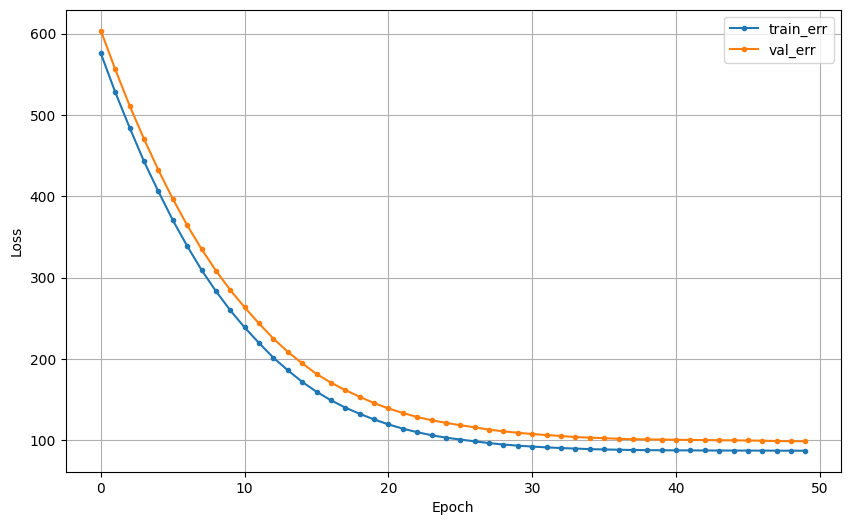

In [70]:
dl_history_plot(hist)

* 예측 및 평가

In [71]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 8.082653380259634
MAE  : 5.591116983750288
MAPE : 0.32803971930507103


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [94]:
# from keras.backend import clear_session
# from keras.models import Sequential
# from keras.layers import Dense
clear_session()
model = Sequential( [ Dense(8, input_shape = (x_train.shape[1],), activation='relu'),
                     Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [95]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 392.8735 - val_loss: 210.9725
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 160.0147 - val_loss: 159.2983
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 112.5034 - val_loss: 107.2451
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 81.9626 - val_loss: 66.7975
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 65.9706 - val_loss: 55.2689
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 60.3531 - val_loss: 47.7031
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 55.5781 - val_loss: 43.6671
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 51.4602 - val_loss: 42.5332
Epoch 9/50
11/11 [==============================] - 0s 8ms/step - loss: 47.6963 - val_loss: 36.6463
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 46.0333 - val_loss

* 학습곡선

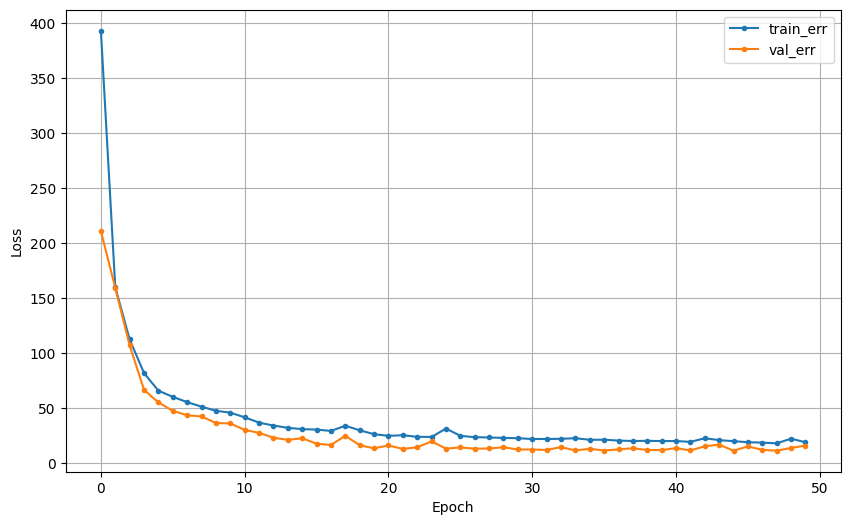

In [96]:
dl_history_plot(history)

* 검증

In [97]:
y_pred = model.predict(x_val)
print('RMSE :', mean_squared_error(y_val, y_pred, squared=False))
print('MAE :', mean_absolute_error(y_val, y_pred))
print('MAPE :', mean_absolute_percentage_error(y_val, y_pred))

4/4 [==============================] - 0s 3ms/step
RMSE : 4.1424613546480895
MAE : 2.9993892276988317
MAPE : 0.14750861541362043


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [106]:
clear_session()
model = Sequential( [ Dense(8, input_shape= (x_train.shape[1],), activation='relu'),
                     Dense(4, activation='relu'),
                      Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [107]:
model.compile( optimizer= Adam(learning_rate=0.05), loss='mse')
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=0).history

* 학습곡선

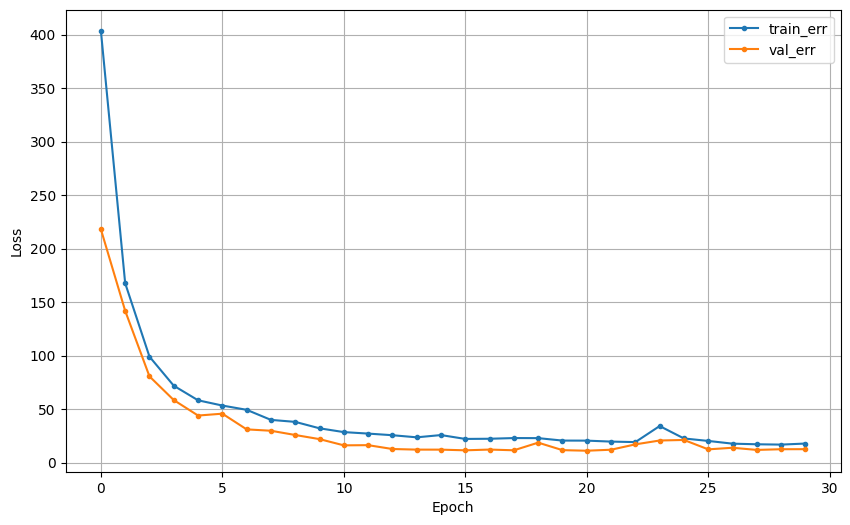

In [104]:
dl_history_plot(history)

* 검증

In [105]:
y_pred = model.predict(x_val)
print('RMSE :', mean_squared_error(y_val, y_pred, squared=False))
print('MAE :', mean_absolute_error(y_val, y_pred))
print('MAPE :', mean_absolute_percentage_error(y_val, y_pred))

4/4 [==============================] - 0s 3ms/step
RMSE : 3.97169042804377
MAE : 2.98167597172307
MAPE : 0.1553463661198244


In [110]:
y_pred.reshape(-1)

array([19.400253 , 23.688938 , 17.51731  , 18.827316 , 13.113913 ,
       21.617641 , 16.75135  ,  7.74377  , 20.042984 , 21.832148 ,
       23.742374 , 15.872225 , 24.22261  , 22.489851 , 21.53983  ,
       25.637976 , 27.892002 , 14.612452 , 15.245596 , 19.01395  ,
       45.022594 , 48.665997 , 24.17355  , 28.178642 , 21.467728 ,
       25.169014 , 21.363379 , 24.419844 , 20.551098 , 24.518631 ,
       15.331669 , 15.092272 , 20.968243 , 10.751444 , 29.820091 ,
       22.12253  , 50.123222 , 24.618992 , 21.287273 , 31.103436 ,
        9.0021515, 14.30895  ,  8.853227 , 14.917286 , 24.596844 ,
       24.517921 , 22.233118 , 22.122347 ,  9.966148 , 13.050472 ,
       39.197468 , 32.513866 , 11.706472 , 40.24777  , 18.336596 ,
       23.45875  , 19.056658 , 18.289154 , 17.665981 , 18.762144 ,
       31.989769 , 20.055866 , 20.551435 , 22.013592 , 18.327877 ,
       18.761723 , 24.453556 , 25.824898 , 16.12146  , 14.660946 ,
       35.7549   , 20.727148 , 23.62592  , 22.85366  , 18.0364